# <font style='font-size: 36px;'>Pokémon Analysis</font>
<hr style='border: 2px solid #9893da;'>

Descrição do Projeto: Projeto de análise descritiva de um dataset de Pokémon, da geração I a VI.

Dataset encontrado da internet (GitHub).

Dicionário de Dados:

* *#*: Número do Pokémon em sua ordem oficial.
* *Name*: Nome do Pokémon.
* *Type 1*: Tipo primário do Pokémon.
* *Type 2*: Tipo secundário do Pokémon. Pode ou não ser nulo.
* *Total*: Soma de pontos de todos os atributos do Pokémon.
* *HP*: Pontos de vida base do Pokémon.
* *Attack*: Pontos de ataque base do Pokémon.
* *Defense*: Pontos de defesa base do Pokémon.
* *Sp. Atk*: Pontos de ataque especial base do Pokémon.
* *Sp. Def*: Pontos de defesa especial base do Pokémon.
* *Speed*: Pontos de velocidade base do Pokémon.
* *Generation*: Geração a qual o Pokémon pertence.
* *Legendary*: Variável binária com "False" se o Pokémon não é lendário, e "True" se ele for.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Carregando a base para um dataframe pandas
pokedex = pd.read_csv('data/dados_pokemon.csv', encoding='latin-1')

In [3]:
# Observar as primeiras 5 linhas
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Renomear as colunas para o português e facilitar o código
pokedex.columns = ['Numeração', 
                 'Nome', 
                 'Tipo 1', 
                 'Tipo 2', 
                 'Status Total', 
                 'Vida', 
                 'Ataque', 
                 'Defesa', 
                 'Ataque Especial',
                 'Defesa Especial',
                 'Velocidade',
                 'Geração',
                 'Lendário']
pokedex.head()

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# Trazer todos os tipos únicos do tipo1
pokedex['Tipo 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [6]:
# Renomear os tipos para português
pokedex['Tipo 1'] = pokedex['Tipo 1'].map({'Grass': 'Grama',
                                         'Fire': 'Fogo',
                                         'Water': 'Aquático',
                                         'Bug': 'Inseto',
                                         'Normal': 'Normal',
                                         'Poison': 'Venenoso',
                                         'Electric': 'Elétrico',
                                         'Ground': 'Terra',
                                         'Fairy': 'Fada',
                                         'Fighting': 'Lutador',
                                         'Psychic': 'Psíquico',
                                         'Rock': 'Pedra',
                                         'Ghost': 'Fantasma',
                                         'Ice': 'Gelo',
                                         'Dragon': 'Dragão',
                                         'Dark': 'Trevas',
                                         'Steel': 'Aço',
                                         'Flying': 'Voador',})
pokedex['Tipo 1'].unique()

array(['Grama', 'Fogo', 'Aquático', 'Inseto', 'Normal', 'Venenoso',
       'Elétrico', 'Terra', 'Fada', 'Lutador', 'Psíquico', 'Pedra',
       'Fantasma', 'Gelo', 'Dragão', 'Trevas', 'Aço', 'Voador'],
      dtype=object)

In [7]:
pokedex['Tipo 2'] = pokedex['Tipo 2'].map({'Grass': 'Grama',
                                         'Fire': 'Fogo',
                                         'Water': 'Aquático',
                                         'Bug': 'Inseto',
                                         'Normal': 'Normal',
                                         'Poison': 'Venenoso',
                                         'Electric': 'Elétrico',
                                         'Ground': 'Terra',
                                         'Fairy': 'Fada',
                                         'Fighting': 'Lutador',
                                         'Psychic': 'Psíquico',
                                         'Rock': 'Pedra',
                                         'Ghost': 'Fantasma',
                                         'Ice': 'Gelo',
                                         'Dragon': 'Dragão',
                                         'Dark': 'Trevas',
                                         'Steel': 'Aço',
                                         'Flying': 'Voador',})
pokedex['Tipo 2'].unique()

array(['Venenoso', nan, 'Voador', 'Dragão', 'Terra', 'Fada', 'Grama',
       'Lutador', 'Psíquico', 'Aço', 'Gelo', 'Pedra', 'Trevas',
       'Aquático', 'Elétrico', 'Fogo', 'Fantasma', 'Inseto', 'Normal'],
      dtype=object)

In [8]:
pokedex.shape

(800, 13)

In [9]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Numeração        800 non-null    int64 
 1   Nome             800 non-null    object
 2   Tipo 1           800 non-null    object
 3   Tipo 2           414 non-null    object
 4   Status Total     800 non-null    int64 
 5   Vida             800 non-null    int64 
 6   Ataque           800 non-null    int64 
 7   Defesa           800 non-null    int64 
 8   Ataque Especial  800 non-null    int64 
 9   Defesa Especial  800 non-null    int64 
 10  Velocidade       800 non-null    int64 
 11  Geração          800 non-null    int64 
 12  Lendário         800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
pokedex.isnull().sum()

Numeração            0
Nome                 0
Tipo 1               0
Tipo 2             386
Status Total         0
Vida                 0
Ataque               0
Defesa               0
Ataque Especial      0
Defesa Especial      0
Velocidade           0
Geração              0
Lendário             0
dtype: int64

#### Os valores faltantes na variável TIPO 2 indicam que existem 386 Pokémon que fazem parte do grupo com apenas um tipo.

### Quantos Pokémon possuem um só tipo?
<hr style='border: 1px solid #9893da;'>

In [11]:
pokemon_monotype = pokedex[pokedex['Tipo 2'].isnull()]
pokemon_monotype

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fogo,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Aquático,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Aquático,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Aquático,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragão,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragão,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Gelo,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Gelo,NaN,514,95,117,184,44,46,28,6,False


In [12]:
pokemon_monotype['Tipo 1'].value_counts()

Normal      61
Aquático    59
Psíquico    38
Grama       33
Fogo        28
Elétrico    27
Lutador     20
Inseto      17
Fada        15
Venenoso    15
Terra       13
Gelo        13
Dragão      11
Trevas      10
Fantasma    10
Pedra        9
Aço          5
Voador       2
Name: Tipo 1, dtype: int64

In [13]:
plot_order = pokemon_monotype['Tipo 1'].value_counts().index
plot_order

Index(['Normal', 'Aquático', 'Psíquico', 'Grama', 'Fogo', 'Elétrico',
       'Lutador', 'Inseto', 'Fada', 'Venenoso', 'Terra', 'Gelo', 'Dragão',
       'Trevas', 'Fantasma', 'Pedra', 'Aço', 'Voador'],
      dtype='object')

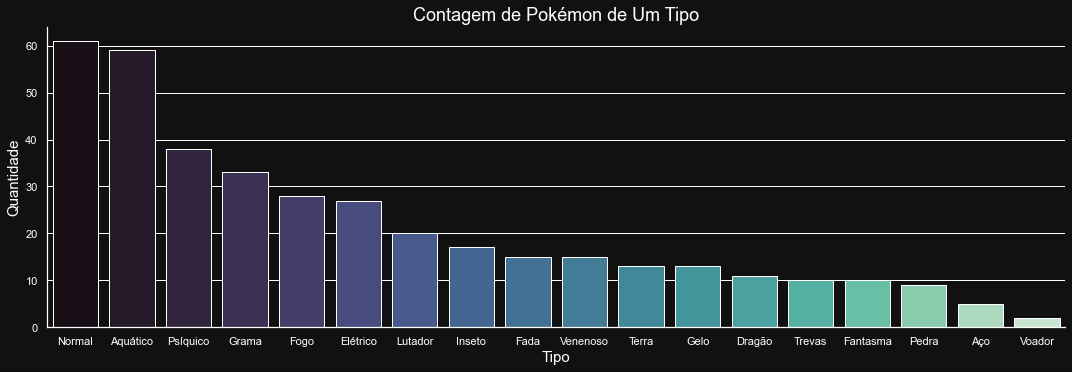

In [14]:
# Plotando a qtde. de Pokémon com um tipo

sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
plot_monotype = sns.catplot(x = 'Tipo 1',
                            kind = 'count',
                            data = pokemon_monotype,
                            aspect = 3,
                            palette = 'mako',
                            order = plot_order)

c = 'white'
ax = plot_monotype.ax
ax.set_title('Contagem de Pokémon de Um Tipo', fontsize = 18, color = c)
ax.set_xlabel('Tipo', fontsize = 15, color = c)
ax.set_ylabel('Quantidade', fontsize = 15, color = c)
ax.tick_params(axis='x', colors = c)
ax.tick_params(axis='y', colors = c)
ax.spines['left'].set_color(c) 
ax.spines['bottom'].set_color(c) 

### Quantos Pokémon possuem dois tipos?
<hr style='border: 1px solid #9893da;'>

In [15]:
pokemon_duotype = pokedex[pokedex['Tipo 2'].notnull()]
pokemon_duotype

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fogo,Voador,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True


In [16]:
# Criando um crosstab para ver a qtde. exata
duotype_count = pd.crosstab(pokedex['Tipo 1'],
                            pokedex['Tipo 2'],
                            rownames = ['Tipo Primário'],
                            colnames = ['Tipo Secundário'])

duotype_count

Tipo Secundário,Aquático,Aço,Dragão,Elétrico,Fada,Fantasma,Fogo,Gelo,Grama,Inseto,Lutador,Normal,Pedra,Psíquico,Terra,Trevas,Venenoso,Voador
Tipo Primário,,,,,,,,,,,,,,,,,,
Aquático,0,1,2,2,2,2,0,3,3,0,3,0,4,5,10,6,3,7
Aço,0,0,1,0,3,4,0,0,0,0,1,0,3,7,2,0,0,1
Dragão,0,0,0,1,1,0,1,3,0,0,0,0,0,4,5,0,0,6
Elétrico,1,3,1,0,1,1,1,1,1,0,0,2,0,0,0,0,0,5
Fada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Fantasma,0,0,2,0,0,0,3,0,10,0,0,0,0,0,0,1,4,2
Fogo,1,1,1,0,0,0,0,0,0,0,7,2,1,2,3,0,0,6
Gelo,3,0,0,0,0,1,0,0,0,0,0,0,0,2,3,0,0,2
Grama,0,2,1,0,2,0,0,3,0,0,3,0,0,2,1,3,15,5


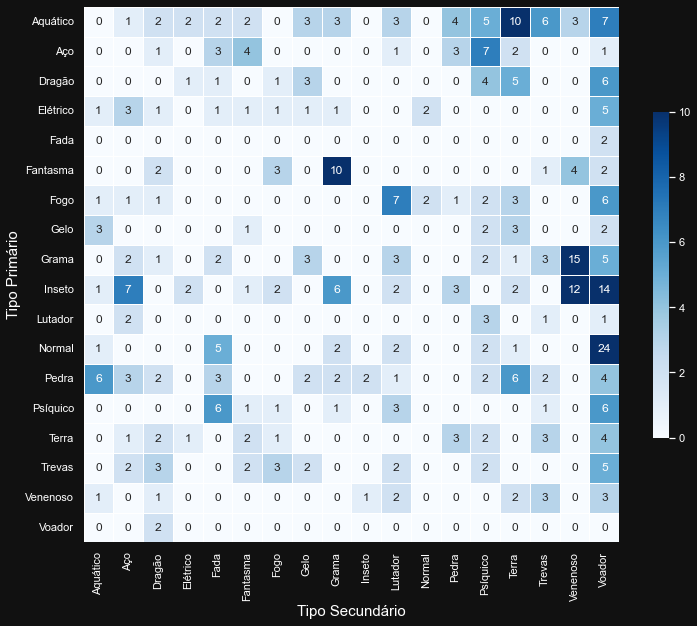

In [17]:
# Plotando a qtde. de Pokémon com dois tipos utilizando o crosstab
fig = plt.subplots(figsize = (12, 12)) 
plot_duotype = sns.heatmap(data = duotype_count,
                           cmap= 'Blues',
                           vmin= 0,
                           vmax= 10,
                           linewidth=1,
                           square = True,
                           annot=True,
                           cbar_kws={"shrink": .5})

plot_duotype.set_xlabel('Tipo Secundário', fontsize = 15, color = c)
plot_duotype.set_ylabel('Tipo Primário', fontsize = 15, color = c)
plot_duotype.tick_params(axis='x', colors = c)
plot_duotype.tick_params(axis='y', colors = c)

cbar = plot_duotype.collections[0].colorbar
cbar.ax.tick_params(colors = c)

### Quantos Pokémon de cada tipo existem no total (considerando primários e secundários juntos)?
<hr style='border: 1px solid #9893da;'>

In [18]:
print(pokedex['Tipo 1'].value_counts().sort_values(ascending = False))
print(pokedex['Tipo 2'].value_counts().sort_values(ascending = False))

Aquático    112
Normal       98
Grama        70
Inseto       69
Psíquico     57
Fogo         52
Elétrico     44
Pedra        44
Fantasma     32
Terra        32
Dragão       32
Trevas       31
Venenoso     28
Aço          27
Lutador      27
Gelo         24
Fada         17
Voador        4
Name: Tipo 1, dtype: int64
Voador      97
Terra       35
Venenoso    34
Psíquico    33
Lutador     26
Grama       25
Fada        23
Aço         22
Trevas      20
Dragão      18
Aquático    14
Fantasma    14
Gelo        14
Pedra       14
Fogo        12
Elétrico     6
Normal       4
Inseto       3
Name: Tipo 2, dtype: int64


In [19]:
# Calculando o total de tipos existentes
A = pokedex['Tipo 1'].value_counts()
B = pokedex['Tipo 2'].value_counts()
total_tipos_pokemon = A + B
total_tipos_pokemon.sort_values(ascending = False, inplace = True)

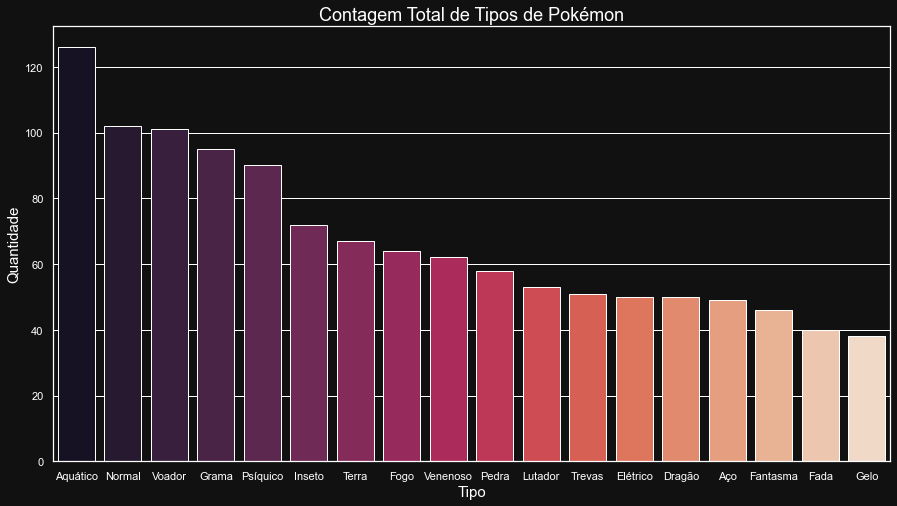

In [20]:
sns.set(rc={'figure.figsize':(15, 8), 'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
total_count_plot = sns.barplot(x=total_tipos_pokemon.index,
                   y = total_tipos_pokemon.values,
                   palette = 'rocket')

total_count_plot.set_title('Contagem Total de Tipos de Pokémon', fontsize = 18, color = c)
total_count_plot.set_xlabel('Tipo', fontsize = 15, color = c)
total_count_plot.set_ylabel('Quantidade', fontsize = 15, color = c)
total_count_plot.tick_params(axis='x', colors = c)
total_count_plot.tick_params(axis='y', colors = c)
total_count_plot.spines['left'].set_color(c) 
total_count_plot.spines['bottom'].set_color(c) 

### Quantos Pokémon tem em cada geração? Qual a geração com a média de Status Points total maior?
<hr style='border: 1px solid #9893da;'>

In [21]:
pokedex.Geração.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [22]:
# Agrupando os Pokémon por geração
qtde_geracao = pokedex.groupby('Geração')['Nome'].count()
qtde_geracao

Geração
1    166
2    106
3    160
4    121
5    165
6     82
Name: Nome, dtype: int64

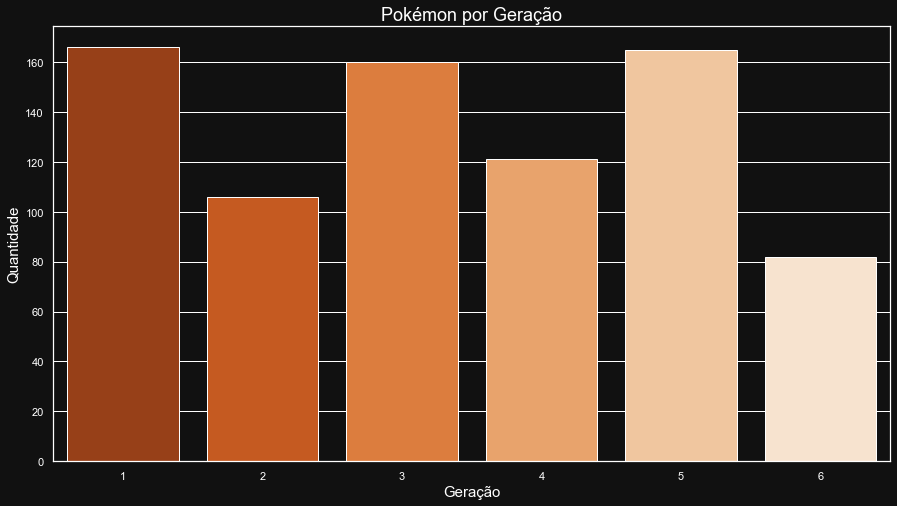

In [23]:
sns.set(rc={'figure.figsize':(15, 8), 'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
qtde_geracao_ax = sns.barplot(x=qtde_geracao.index,
                              y=qtde_geracao.values,
                              palette = 'Oranges_r')

qtde_geracao_ax.set_title('Pokémon por Geração', fontsize = 18, color = c)
qtde_geracao_ax.set_xlabel('Geração', fontsize = 15, color = c)
qtde_geracao_ax.set_ylabel('Quantidade', fontsize = 15, color = c)
qtde_geracao_ax.tick_params(axis='x', colors = c)
qtde_geracao_ax.tick_params(axis='y', colors = c)
qtde_geracao_ax.spines['left'].set_color(c) 
qtde_geracao_ax.spines['bottom'].set_color(c) 

In [24]:
print('A geração que tem a maior média em relação ao total de Status Points é a %dª, no valor de %.2f.' % 
      (pokedex.groupby('Geração')['Status Total'].mean().sort_values().index[-1],
       pokedex.groupby('Geração')['Status Total'].mean().max()))

A geração que tem a maior média em relação ao total de Status Points é a 4ª, no valor de 459.02.


### Quantos Pokémon são lendários?
<hr style='border: 1px solid #9893da;'>

In [25]:
todos_lendarios = pokedex[pokedex.Lendário == True]
todos_lendarios['Nome']

156               Articuno
157                 Zapdos
158                Moltres
162                 Mewtwo
163    MewtwoMega Mewtwo X
              ...         
795                Diancie
796    DiancieMega Diancie
797    HoopaHoopa Confined
798     HoopaHoopa Unbound
799              Volcanion
Name: Nome, Length: 65, dtype: object

In [26]:
print('Há um total de %d Pokémon lendários no DataFrame.' % todos_lendarios['Nome'].count())

Há um total de 65 Pokémon lendários no DataFrame.


### Baseado na soma do ataque e ataque especial, separe os Pokémon que tem um valor maior ou igual a 200 em um DataFrame separado.
<hr style='border: 1px solid #9893da;'>

In [27]:
pokedex_atq = pokedex.copy(deep = True)
pokedex_atq

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True


In [28]:
# Criando uma nova coluna no DataFrame novo para usá-lo como referência
for index, row in pokedex_atq.iterrows():
    pokedex_atq.loc[index, 'Ataque Total Soma'] = row['Ataque'] + row['Ataque Especial']

pokedex_atq['Ataque Total Soma'] = pokedex_atq['Ataque Total Soma'].astype(int)
pokedex_atq

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário,Ataque Total Soma
0,1,Bulbasaur,Grama,Venenoso,318,45,49,49,65,65,45,1,False,114
1,2,Ivysaur,Grama,Venenoso,405,60,62,63,80,80,60,1,False,142
2,3,Venusaur,Grama,Venenoso,525,80,82,83,100,100,80,1,False,182
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False,222
4,4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True,200
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True,320
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True,260
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True,330


In [29]:
# Utilizando a nova coluna para fazer a filtragem
pokemon_ofensivos = pokedex_atq[pokedex_atq['Ataque Total Soma'] >= 200]
pokemon_ofensivos

,Numeração,Nome,Tipo 1,Tipo 2,Status Total,Vida,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade,Geração,Lendário,Ataque Total Soma
3,3,VenusaurMega Venusaur,Grama,Venenoso,625,80,100,123,122,120,80,1,False,222
7,6,CharizardMega Charizard X,Fogo,Dragão,634,78,130,111,130,85,100,1,False,260
8,6,CharizardMega Charizard Y,Fogo,Voador,634,78,104,78,159,115,100,1,False,263
12,9,BlastoiseMega Blastoise,Aquático,NaN,630,79,103,120,135,115,78,1,False,238
23,18,PidgeotMega Pidgeot,Normal,Voador,579,83,80,80,135,80,121,1,False,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Pedra,Fada,600,50,100,150,100,150,50,6,True,200
796,719,DiancieMega Diancie,Pedra,Fada,700,50,160,110,160,110,110,6,True,320
797,720,HoopaHoopa Confined,Psíquico,Fantasma,600,80,110,60,150,130,70,6,True,260
798,720,HoopaHoopa Unbound,Psíquico,Trevas,680,80,160,60,170,130,80,6,True,330


### Classifique os Pokémon entre Uber, OU (OverUsed), UU (UnderUsed), RU (RarelyUsed) e NU (NeverUsed) de acordo com o total de Status Points, utilizando esta [referência](https://www.smogon.com/bw/articles/bw_tiers).
<hr style='border: 1px solid #9893da;'>

In [30]:
pokedex['Status Total'].min()

180

In [31]:
pokedex['Status Total'].max()

780

In [32]:
# Criando os limites de classe
classes = [pokedex['Status Total'].min(),
           199,
           349,
           549,
           699,
           pokedex['Status Total'].max()]

classes

[180, 199, 349, 549, 699, 780]

In [33]:
# Criando os labels para cada classe
labels = ['NU',
          'RU',
          'UU',
          'OU',
          'Uber']

labels

['NU', 'RU', 'UU', 'OU', 'Uber']

In [34]:
# Criando a Series de frequência
frequencia = pd.value_counts(
  pd.cut(x = pokedex['Status Total'],
         bins = classes,
         labels = labels,
         include_lowest = True)
)

frequencia

UU      437
RU      233
OU      108
Uber     15
NU        7
Name: Status Total, dtype: int64

In [35]:
# Criando a Series de percentuais
percentual = pd.value_counts(
  pd.cut(x = pokedex['Status Total'],
         bins = classes,
         labels = labels,
         include_lowest = True),
         normalize = True # o parâmetro normalize no value_counts fará retornar um objeto com as frequências relativas dos valores únicos
) * 100

percentual

UU      54.625
RU      29.125
OU      13.500
Uber     1.875
NU       0.875
Name: Status Total, dtype: float64

In [36]:
# Criando o df personalizado com as informações de distribuição de frequência
dist_freq_quantitativas_pokemon = pd.DataFrame(
    {'Frequência': frequencia, 'Percentual (%)': percentual}
)

dist_freq_quantitativas_pokemon.rename_axis('Classificação', axis = 'columns', inplace = True)
dist_freq_quantitativas_pokemon.sort_index(ascending = False)

Classificação,Frequência,Percentual (%)
Uber,15,1.875
OU,108,13.500
UU,437,54.625
RU,233,29.125
NU,7,0.875


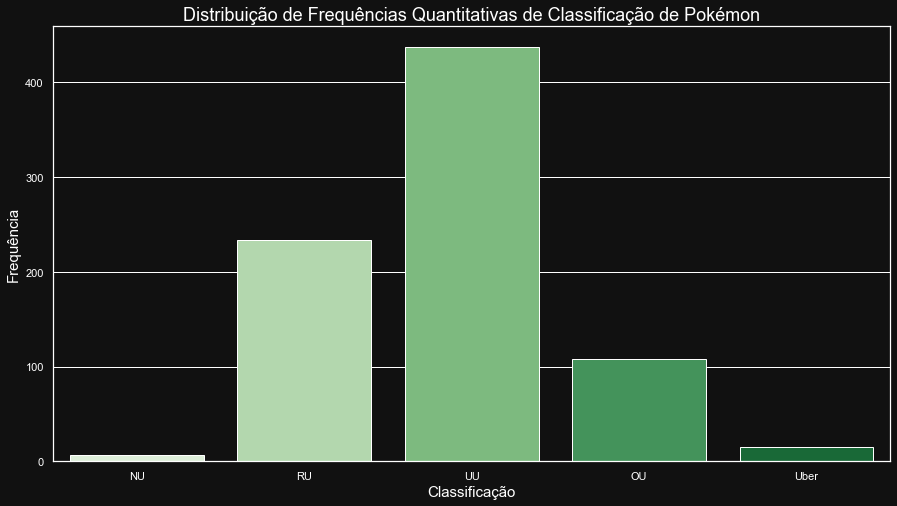

In [37]:
# Plotando a frequência
sns.set(rc={'figure.figsize':(15, 8), 'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
dist_freq_quantitativas_pokemon_plot = sns.barplot(x = dist_freq_quantitativas_pokemon.index,
                                                   y = dist_freq_quantitativas_pokemon['Frequência'],
                                                   palette = 'Greens')

dist_freq_quantitativas_pokemon_plot.set_title('Distribuição de Frequências Quantitativas de Classificação de Pokémon', fontsize = 18, color = c)
dist_freq_quantitativas_pokemon_plot.set_xlabel('Classificação', fontsize = 15, color = c)
dist_freq_quantitativas_pokemon_plot.set_ylabel('Frequência', fontsize = 15, color = c)
dist_freq_quantitativas_pokemon_plot.tick_params(axis='x', colors = c)
dist_freq_quantitativas_pokemon_plot.tick_params(axis='y', colors = c)
dist_freq_quantitativas_pokemon_plot.spines['left'].set_color(c) 
dist_freq_quantitativas_pokemon_plot.spines['bottom'].set_color(c) 

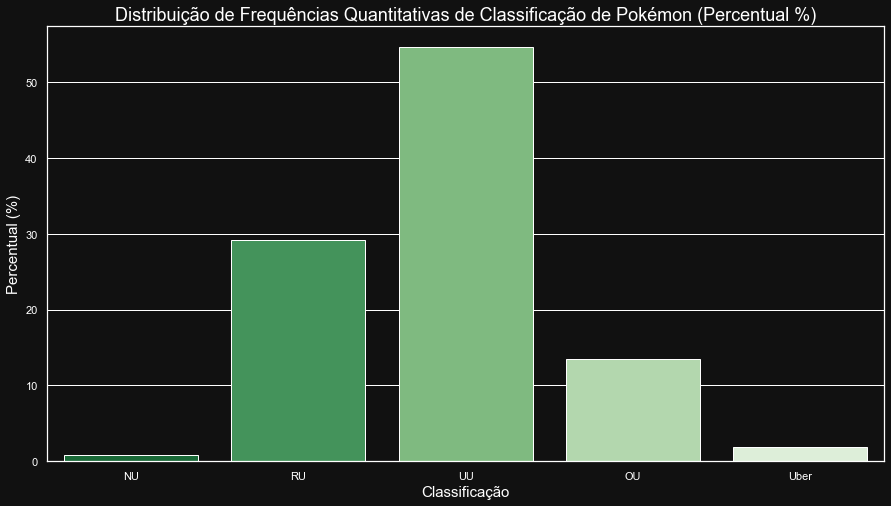

In [38]:
# Plotando o percentual
sns.set(rc={'figure.figsize':(15, 8), 'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
dist_freq_quantitativas_pokemon_plot_percent = sns.barplot(x = dist_freq_quantitativas_pokemon.index,
                                                           y = dist_freq_quantitativas_pokemon['Percentual (%)'],
                                                           palette = 'Greens_r')

dist_freq_quantitativas_pokemon_plot_percent.set_title('Distribuição de Frequências Quantitativas de Classificação de Pokémon (Percentual %)', fontsize = 18, color = c)
dist_freq_quantitativas_pokemon_plot_percent.set_xlabel('Classificação', fontsize = 15, color = c)
dist_freq_quantitativas_pokemon_plot_percent.set_ylabel('Percentual (%)', fontsize = 15, color = c)
dist_freq_quantitativas_pokemon_plot_percent.tick_params(axis='x', colors=c)
dist_freq_quantitativas_pokemon_plot_percent.tick_params(axis='y', colors='white')
dist_freq_quantitativas_pokemon_plot_percent.spines['left'].set_color('white') 
dist_freq_quantitativas_pokemon_plot_percent.spines['bottom'].set_color('white') 

### Crie um histograma para o Status Total.
<hr style='border: 1px solid #9893da;'>

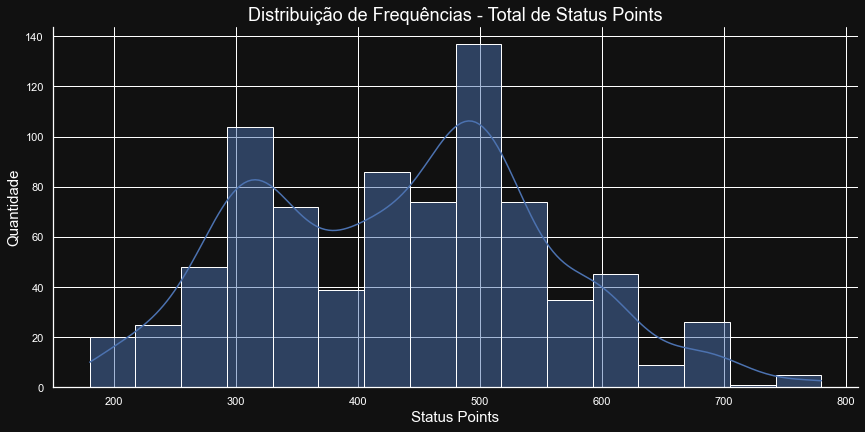

In [39]:
sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
grid = sns.displot(pokedex['Status Total'],
                   kde = True)

ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Total de Status Points', fontsize = 18, color = c)
ax.set_xlabel('Status Points', fontsize = 15, color = c)
ax.set_ylabel('Quantidade', fontsize = 15, color = c)
ax.tick_params(axis='x', colors = c)
ax.tick_params(axis='y', colors = c)
ax.spines['left'].set_color(c) 
ax.spines['bottom'].set_color(c) 

### Cruzando as variáveis Lendário e Geração, determine a média, mediana, valor máximo, desvio médio absoluto, variância e desvio padrão de Status Total de cada um.
<hr style='border: 1px solid #9893da;'>

In [40]:
status_total_estatistica_tendencia_central = pd.crosstab(pokedex.Lendário,
                                                         pokedex.Geração,
                                                         aggfunc = {'mean', 'median', 'max'},
                                                         values = pokedex['Status Total'],
                                                         rownames = ['Lendário?'],
                                                         colnames = ['Geração']).round(2)

status_total_estatistica_tendencia_central.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

status_total_estatistica_tendencia_central

max                                       mean                 \
Geração        1      2      3      4      5      6       1      2       3   
Lendário?                                                                    
Não        640.0  700.0  700.0  700.0  600.0  600.0  417.94  408.3  409.27   
Sim        780.0  680.0  780.0  720.0  700.0  700.0  663.33  620.0  648.89   

                                  median                                     
Geração         4       5       6      1      2      3      4      5      6  
Lendário?                                                                    
Não        437.88  416.62  414.09  422.5  415.0  417.0  477.0  426.5  427.0  
Sim        634.62  618.67  642.50  630.0  580.0  600.0  600.0  600.0  640.0

In [41]:
status_total_estatistica_medidas_dispersao = pd.crosstab(pokedex.Lendário,
                                                            pokedex.Geração,
                                                            aggfunc = {'mad', 'var', 'std'},
                                                            values = pokedex['Status Total'],
                                                            rownames = ['Lendário?'],
                                                            colnames = ['Geração']).round(2)

status_total_estatistica_medidas_dispersao.rename(index = {False: 'Não', True: 'Sim'}, inplace = True)

status_total_estatistica_medidas_dispersao

mad                                        std                  \
Geração        1      2      3      4      5      6       1       2       3   
Lendário?                                                                     
Não        91.47  92.63  96.38  92.40  84.71  85.82  106.96  113.55  117.68   
Sim        83.33  48.00  60.99  46.51  43.56  42.50   98.32   54.77   70.53   

                                      var                                \
Geração         4      5      6         1         2         3         4   
Lendário?                                                                 
Não        107.46  94.35  96.44  11440.28  12893.57  13848.45  11547.88   
Sim         50.43  49.26  45.90   9666.67   3000.00   4975.16   2543.59   

                             
Geração          5        6  
Lendário?                    
Não        8902.20  9300.72  
Sim        2426.67  2107.14

### Construir um boxplot da variável Ataque.
<hr style='border: 1px solid #9893da;'>

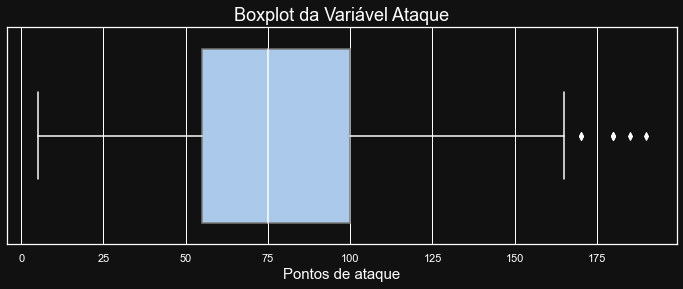

In [42]:
fig, ax = plt.subplots()

sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
boxplot_atq = sns.boxplot(x = 'Ataque', data = pokedex, palette =  'pastel', orient = 'h')

for i in range(len(ax.lines)):
  c = 'white'
  ax.lines[i].set_color(c)
  ax.lines[i].set_mfc(c)
  ax.lines[i].set_mec(c)

boxplot_atq.figure.set_size_inches(12, 4)
boxplot_atq.set_title('Boxplot da Variável Ataque', fontsize = 18, color = c)
boxplot_atq.set_xlabel('Pontos de ataque', fontsize = 15, color = c)
boxplot_atq.tick_params(axis='x', colors = c)
boxplot_atq.spines['left'].set_color(c) 
boxplot_atq.spines['bottom'].set_color(c) 

### A partir do boxplot criado, separe os valores Q1, Q2, IIQ, limites inferior e superior, e remova os outliers.
<hr style='border: 1px solid #9893da;'>

In [43]:
valor = pokedex.Ataque
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

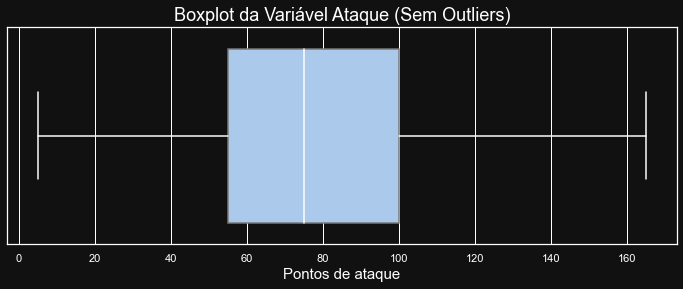

In [44]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
pokedex_new = pokedex[selecao]

fig, ax = plt.subplots()

sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
boxplot_atq = sns.boxplot(x = 'Ataque', data = pokedex_new, palette =  'pastel', orient = 'h')

for i in range(len(ax.lines)):
  c = 'white'
  ax.lines[i].set_color(c)
  ax.lines[i].set_mfc(c)
  ax.lines[i].set_mec(c)

boxplot_atq.figure.set_size_inches(12, 4)
boxplot_atq.set_title('Boxplot da Variável Ataque (Sem Outliers)', fontsize = 18, color = c)
boxplot_atq.set_xlabel('Pontos de ataque', fontsize = 15, color = c)
boxplot_atq.tick_params(axis='x', colors = c)
boxplot_atq.spines['left'].set_color(c) 
boxplot_atq.spines['bottom'].set_color(c) 

### Construir um boxplot da variável Ataque novamente, mas separando se o Pokémon é lendário ou não.
<hr style='border: 1px solid #9893da;'>

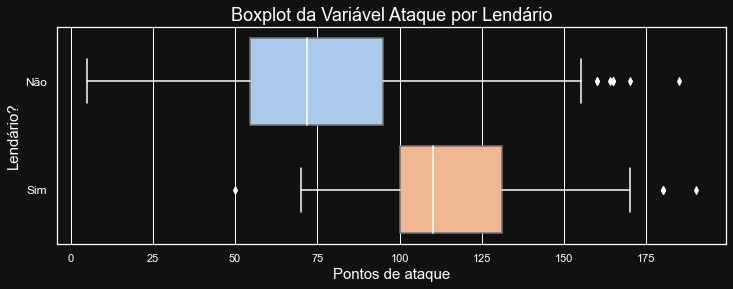

In [45]:
fig, ax = plt.subplots()

sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
boxplot_atq = sns.boxplot(x = 'Ataque', y = 'Lendário', data = pokedex, palette =  'pastel', orient = 'h')

for i in range(len(ax.lines)):
  c = 'white'
  ax.lines[i].set_color(c)
  ax.lines[i].set_mfc(c)
  ax.lines[i].set_mec(c)

boxplot_atq.figure.set_size_inches(12, 4)
boxplot_atq.set_title('Boxplot da Variável Ataque por Lendário', fontsize = 18, color = c)
boxplot_atq.set_xlabel('Pontos de ataque', fontsize = 15, color = c)
boxplot_atq.set_ylabel('Lendário?', fontsize = 15, color = c)
boxplot_atq.set_yticklabels(['Não', 'Sim'], fontsize = 12, color = c)
boxplot_atq.tick_params(axis='x', colors = c)
boxplot_atq.spines['left'].set_color(c) 
boxplot_atq.spines['bottom'].set_color(c) 

### Construir um boxplot da variável Status Total de acordo com as variáveis Lendário e Geração, utilizando somente informações dos Pokémon com Status Total maior que 300.
<hr style='border: 1px solid #9893da;'>

[None, None, None, None]

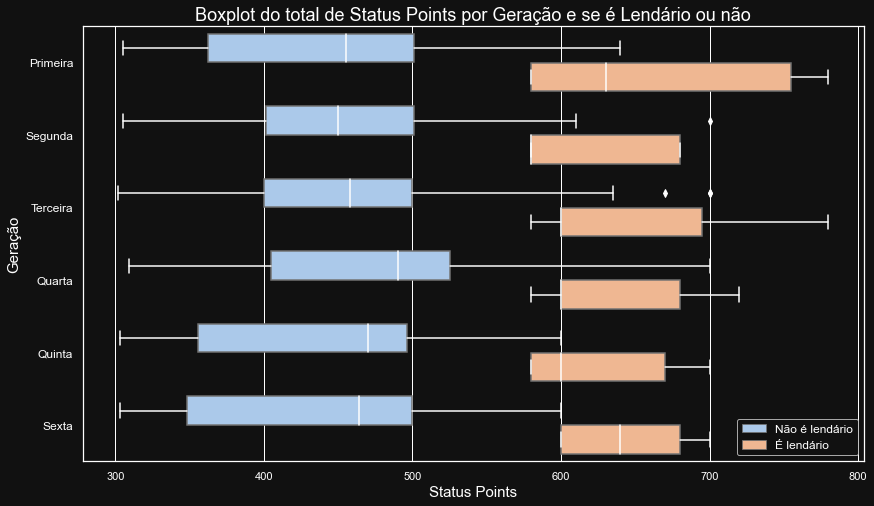

In [46]:
fig, ax = plt.subplots()

sns.set(rc={'axes.facecolor':'#111111', 'figure.facecolor':'#111111'})
boxplot_status_total = sns.boxplot(x = 'Status Total', y = 'Geração', hue = 'Lendário', data = pokedex[pokedex['Status Total'] > 300], palette =  'pastel', orient = 'h')  # Configurações iniciais do plot

for i in range(len(ax.lines)):
  c = 'white'
  ax.lines[i].set_color(c)
  ax.lines[i].set_mfc(c)
  ax.lines[i].set_mec(c)

boxplot_status_total.figure.set_size_inches(14, 8) # Personalizando o tamanho da figura

boxplot_status_total.set_title('Boxplot do total de Status Points por Geração e se é Lendário ou não', fontsize = 18, color = c) # Configurando o título do gráfico

boxplot_status_total.set_xlabel('Status Points', fontsize = 15, color = c) # Configurando o label do eixo X

boxplot_status_total.set_ylabel('Geração', fontsize = 15, color = c) # Configurando o label do eixo Y

boxplot_status_total.set_yticklabels(['Primeira', 'Segunda', 'Terceira', 'Quarta', 'Quinta', 'Sexta'], fontsize = 12, color = c)  # Configurando o label de cada categoria do eixo Y

boxplot_status_total.tick_params(axis='x', colors = c)

# Configurações da legenda do gráfico (Lendário ou não)
handles, _ = boxplot_status_total.get_legend_handles_labels() # o _ significa, nesse caso, que não interessa o valor, então ele será vazio
boxplot_status_total.legend(handles, ['Não é lendário', 'É lendário'], fontsize = 12)
plt.setp(boxplot_status_total.get_legend().get_texts(), color = c)

## Pontos fortes e pontos fracos do nteract.
<hr style='border: 1px solid #9893da;'>

#### Pontos fortes:

- Inicialização melhor otimizada que o Jupyter.
- Várias opções de formatação de célula facilmente encontradas nas próprias células.
- UI mais simples do que o Jupyter, deixando uma área de trabalho maior.
- DARK THEME!!!!!!!!!!!!!!

#### Pontos fracos:

- Atalhos do Jupyter não funcionam com o nteract.
- Pela falta de atalhos, alguns comandos se tornam mais chatos por necessitarem colocar a mão no mouse.
- Cores de títulos não funcionam.

<hr style='border: 1px solid #9893da;'>

# <font style='font-size: 36px;'>Fim!</font>